In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

import btk 


In [ ]:
COSMOS_CATALOG_PATHS = [
    "../data/cosmos/real_galaxy_catalog_23.5_example.fits",
    "../data/cosmos/real_galaxy_catalog_23.5_example_fits.fits",
]


In [ ]:
SEED = 0 
catalog = btk.catalog.CosmosCatalog.from_file(COSMOS_CATALOG_PATHS)

_ = catalog.get_raw_catalog()

survey = btk.survey.get_surveys("LSST")
fltr = survey.get_filter("r")
assert hasattr(fltr, "psf")

stamp_size = 24.0
max_shift = 1.0
sampling_function = btk.sampling_functions.DefaultSampling(
    max_number=1,
    min_number=1,
    stamp_size=stamp_size,
    max_shift=max_shift,
    min_mag=20,
    max_mag=21,
    seed=SEED,
    mag_name="MAG",
)

batch_size = 10

draw_generator = btk.draw_blends.CosmosGenerator(
    catalog,
    sampling_function,
    survey,
    batch_size=batch_size,
    stamp_size=stamp_size,
    njobs=1,
    add_noise="all",
    seed=SEED,
    gal_type="real",
    noise_pad_size=0
)


In [ ]:
batch = next(draw_generator)

In [ ]:
batch.blend_images.shape

(10, 6, 120, 120)

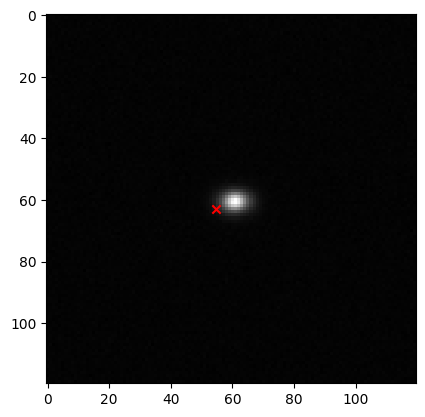

In [ ]:
# plot the first blend in the batch, with the r-band
plt.imshow(batch.blend_images[9, 2, :, :], cmap="gray")

# plot centers
plt.scatter(batch.catalog_list[4]["x_peak"], 
            batch.catalog_list[4]["y_peak"], c="r", marker="x")

In [ ]:
batch.blend_images[0][2].sum()

8765046.999999648

In [ ]:
batch.blend_images[0, 2]

(10, 6, 120, 120)

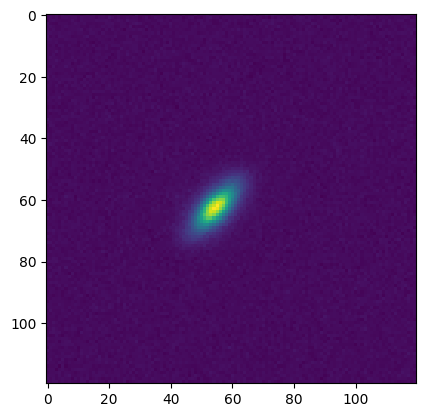

In [ ]:
plt.imshow(batch.blend_images[1,0])

In [ ]:


gal_type = "real" # to choose between real and parametric models
draw_generator = btk.draw_blends.CosmosGenerator(
        catalog,
        sampling_function,
        survey,
        batch_size=batch_size,
        stamp_size=stamp_size,
        cpus=1,
        add_noise="all",
        verbose=False,
        gal_type=gal_type,
    )

